### Data analysis in astronomy at NTU 

Week 8

Ting-Wen Lan 

Regression

In [4]:
'''
!pip install https://www.astro.rug.nl/software/kapteyn/kapteyn-3.0.tar.gz
'''
# If you are using google colab

# You also need to mount your drive and put the file in it
'''
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Data analysis in Astro/Week 1 code/"
'''

'\nfrom google.colab import drive\ndrive.mount(\'/content/gdrive\', force_remount=True)\nroot_dir = "/content/gdrive/My Drive/Data analysis in Astro/Week 1 code/"\n'

In [2]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import my_plot_style as mps
import matplotlib.cm as cm
import importlib
import scipy.stats as ss
from kapteyn import kmpfit

#import bin_maker as bm
#importlib.reload(bm)
#importlib.reload(mps)
mps.my_plot_style()

In [3]:
data = pf.getdata('../week_6/hubble_original_data.fits',1) 
# https://www.dropbox.com/s/c8qomgjpbvlj87o/hubble_original_data.fits?dl=0

In [4]:
#data = pf.getdata('Hubble_key_projects.fits')
# https://www.dropbox.com/s/tuyddn6l75p43mh/Hubble_key_projects.fits?dl=0

In [5]:
x = data['distance']
y = data['velocity']

Text(0.5, 1.0, 'Hubble (1929)')

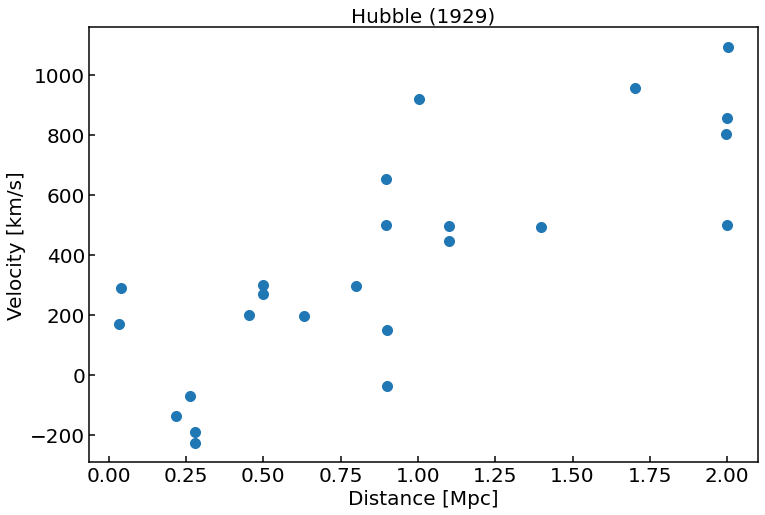

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(data['distance'],data['velocity'],marker='o',s=100)
plt.xlabel('Distance [Mpc]',fontsize=20)
plt.ylabel('Velocity [km/s]',fontsize=20)
# data from Hubble (1929)
plt.title('Hubble (1929)')

# how to quantify the correlation between distance and velocity and demonstrate it is significant? -> Correlation coefficient

In [7]:
print(ss.spearmanr(x,y)[0])
print(ss.pearsonr(x,y)[0])

0.7756745730076907
0.7879859840245418


### Bootstrap estimates the uncertainty

In [8]:
coefficient = []
for i_boot in range(0,1000):
    random_index = np.random.randint(0,len(x),len(x))
    coefficient.append(ss.pearsonr(x[random_index],y[random_index])[0])

In [9]:
print(np.std(coefficient))

0.0713130983526378


### ~10 sigma detection

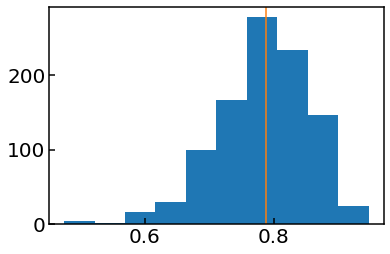

In [10]:
plt.hist(coefficient)
plt.axvline(ss.pearsonr(x,y)[0],color='C1')

# Hubble detected the expansion of the Universe!

# Now, we would to know how fast the Universe expands!

### Let's do it in 3 lines

In [11]:
from scipy.optimize import curve_fit

In [12]:
def linear_model_scipy(x, a):
    return a*x

In [13]:
best_fit_parameter, pcov = curve_fit(linear_model_scipy, x, y)

In [14]:
best_fit_parameter

array([422.72118426])

In [15]:
print('The hubble constant is %0.2f [km/s/Mpc]' % best_fit_parameter)

The hubble constant is 422.72 [km/s/Mpc]


### using another code 
### kmpfit
### https://www.astro.rug.nl/software/kapteyn/kmpfittutorial.html

In [16]:
from kapteyn import kmpfit

In [17]:
def linear_model(p, x):       # The model that should represent the data
    a =  p            # p == (a,b)
    return a*x

In [18]:
def residual(p, data):
    x, y   = data
    return (y-linear_model(p,x))#/err # The algorithm will do the square

In [19]:
x = data['distance'].astype('float64')
y = data['velocity'].astype('float64')
fitobj = kmpfit.Fitter(residuals=residual, data=(x,y))

'''
fitobj.parinfo = ({'fixed':False},{'fixed':True} # if you want to constrain the range of the parameters
                  )
'''
paramsinitial = [75]
fitobj.fit(params0=paramsinitial)

1

In [20]:
print('The hubble constant is %0.2f [km/s/Mpc]' % fitobj.params[0])

The hubble constant is 422.72 [km/s/Mpc]


# Must check whether or not the best fit makes sense

Text(0, 0.5, 'Velocity [km/s]')

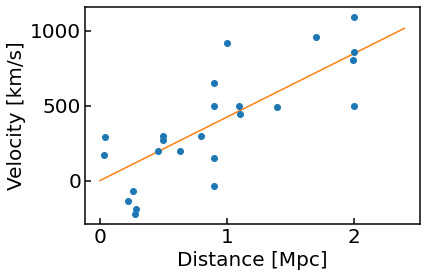

In [21]:
plt.errorbar(data['distance'],data['velocity'],ls='',marker='o')
plt.plot(np.arange(0,2.5,0.1),linear_model(fitobj.params[0],np.arange(0,2.5,0.1)))
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')

# We measure the Hubble constant!!!! ~400 km/s/Mpc

In [22]:
# So What is the code doing to get the best-fit values?

In [23]:
hubble_value = np.arange(0,1000,1)
loss_function = []
for i in range(0,len(hubble_value)):
    data = x, y
    loss_function.append(np.sum(residual(hubble_value[i],data)**2))

Text(0.5, 0, 'km/s/Mpc')

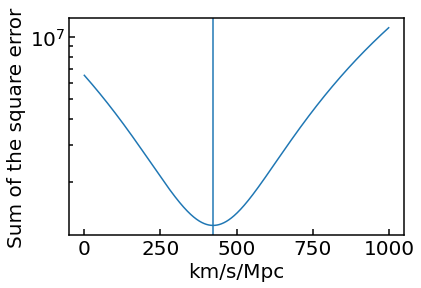

In [24]:
plt.plot(hubble_value,loss_function)
plt.axvline(422.7211838)
plt.yscale('log')
plt.ylabel('Sum of the square error')
plt.xlabel('km/s/Mpc')

# Exercise  high order function

In [25]:
data = pf.getdata('../Week_2/Simple_mass_metallicity_210927.fits',1)
# https://www.dropbox.com/s/ev10vdr6tjb955s/Simple_mass_metallicity_210927.fits?dl=0

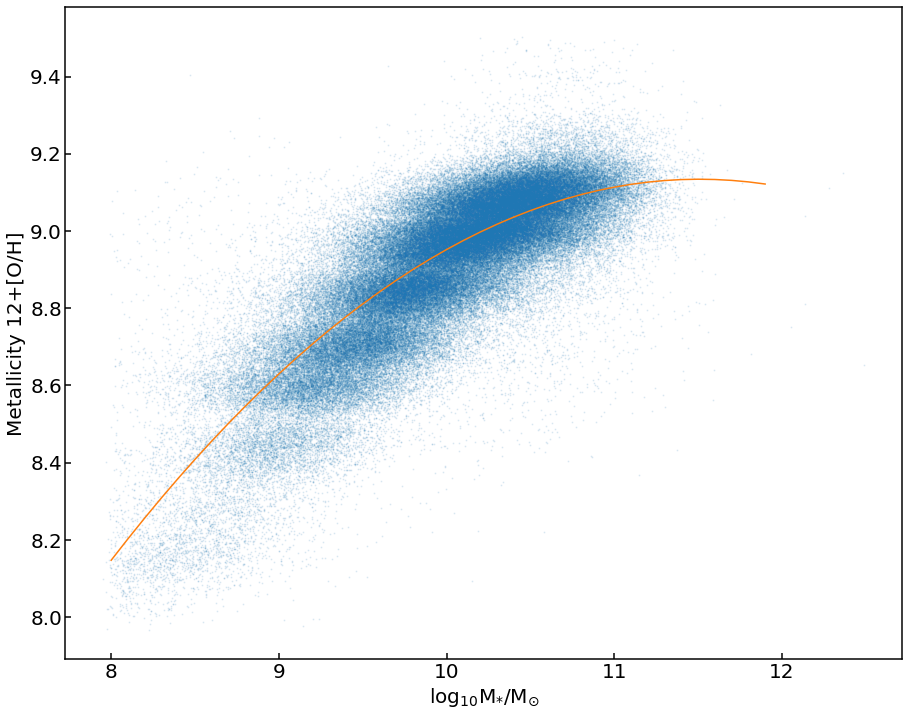

In [27]:
x_all = data['mass'].astype('float64')
y_all = data['OH'].astype('float64')
plt.figure(figsize=(15,12))
plt.scatter(x_all,y_all,s=1,alpha=0.1)
plt.xlabel('$\\rm log_{10} M_{*}/M_{\odot}$',fontsize=20)
plt.ylabel('Metallicity 12+[O/H]',fontsize=20)

plt.plot(np.arange(8,12,0.1),-1.492 + 1.847*np.arange(8,12,0.1)-0.08026*np.arange(8,12,0.1)**2,c='C1')

# Exercise: Write the function to get the best fit parameters

### ---------------------------------------------------------------------------------

# How about the data points with uncertainty?

### Reduced chi2 

In [30]:
x = np.random.random_sample(200)*5

In [31]:
y = linear_model(1,x)+np.random.normal(0,0.5,len(x))

In [32]:
yerr = np.arange(0,len(y))*0.+0.5

<ErrorbarContainer object of 3 artists>

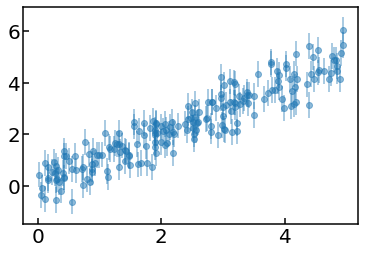

In [33]:
plt.errorbar(x,y,yerr,ls='',marker='o',alpha=0.5)

In [34]:
def residual_2(p, data):
    x, y,yerr   = data
    return (y-linear_model(p,x))/yerr # The algorithm will do the square

In [44]:
paramsinitial = [5.]
fitobj = kmpfit.Fitter(residuals=residual_2, data=(x,y,yerr))
fitobj.fit(params0=paramsinitial)
print(fitobj.params,fitobj.xerror)

[0.999729339011758] [0.01290265]


### If you are interested in how the error propagates, you can check this webpage https://www.astro.rug.nl/software/kapteyn/kmpfittutorial.html

In [45]:
fitobj.rchi2_min

1.103962755866893

In [46]:
best_fit_parameter, pcov = curve_fit(linear_model_scipy, x, y,sigma=yerr, absolute_sigma=True)
best_fit_parameter
perr = np.sqrt(np.diag(pcov))
print(best_fit_parameter, perr)

[0.99972934] [0.01290265]


Text(0, 0.5, 'y')

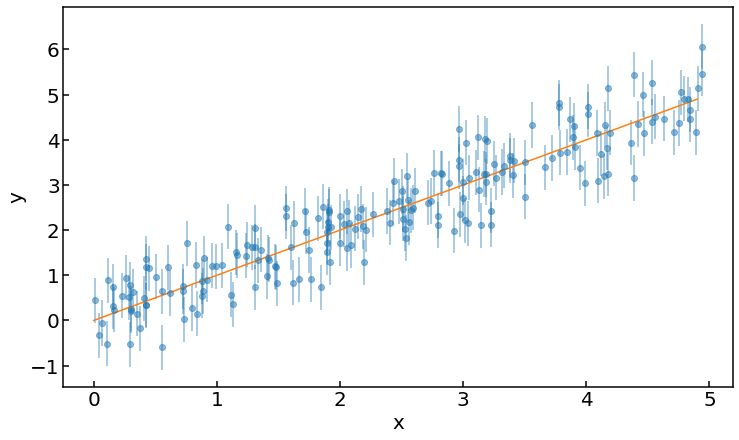

In [47]:
plt.figure(figsize=(12,7))
plt.errorbar(x,y,yerr,ls='',marker='o',alpha=0.5)
plt.plot(np.arange(0,5,0.1),linear_model(fitobj.params[0],np.arange(0,5,0.1)))
plt.xlabel('x')
plt.ylabel('y')

### bootstrapping uncertainty

In [2]:
params = []
for i in range(0,1000):
    random_index = np.random.randint(0,len(x),len(x))
    fitobj = kmpfit.Fitter(residuals=residual_2, data=(x[random_index],y[random_index],yerr[random_index]))
    fitobj.fit(params0=paramsinitial)
    params.append(fitobj.params[0])

NameError: name 'np' is not defined

0.01391510243436896


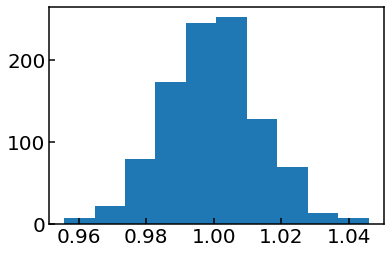

In [55]:
plt.hist(params)
print(np.std(params))

# Exercise (might be a difficult one!)

In [183]:
black_body = pf.getdata('spec-3744-55209-0386.fits',1)
# https://www.dropbox.com/s/n2xrychdkulsqjp/spec-3744-55209-0386.fits?dl=0

In [184]:
search = np.where(black_body['ivar']>0)

In [185]:
flux = black_body['flux'][search[0]].astype('float64')
wavelength = 10**black_body['loglam'][search[0]].astype('float64')
ivar = black_body['ivar'][search[0]].astype('float64')

Text(0, 0.5, 'Flux')

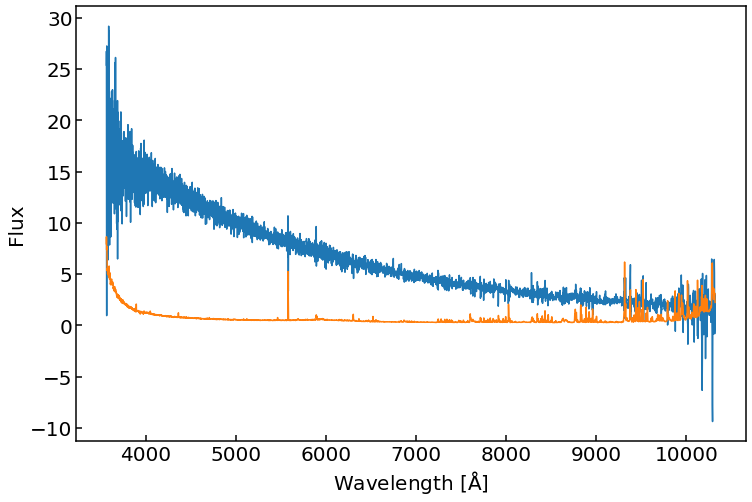

In [274]:
plt.figure(figsize=(12,8))
plt.plot(wavelength,flux)
plt.plot(wavelength,1./np.sqrt(ivar))
plt.xlabel('Wavelength [$\\rm \\AA$]',fontsize=20)
plt.ylabel('Flux',fontsize=20)

In [101]:
def blackbody_SED(p, x):
    # Write the content 
    # parameter [amplitude and temperature]
    # Let's just get the temperature right
    return f_lambda

In [102]:
def residual_function(p,data):
    x,y,y_ivar = data
    return np.sqrt(y_ivar)*(y-blackbody_SED(p,x))

In [103]:
paramsinitial = (1., 10000.)
fitobj = kmpfit.Fitter(residuals=residual_function, data=(wavelength,flux,ivar))
fitobj.fit(params0=paramsinitial)

NameError: name 'wavelength' is not defined

In [104]:
plt.figure(figsize=(15,10))
plt.plot(wavelength,flux)
plt.plot(wavelength,blackbody_SED(fitobj.params,wavelength),lw=5)

NameError: name 'wavelength' is not defined

<Figure size 1080x720 with 0 Axes>

In [105]:
fitobj.rchi2_min

53409.40113698877

# Demo (if time permits)

### This part of the code is from https://astronomy.swin.edu.au/~cblake/stats.html by Chris Blake


In [108]:
# This part of the code is from https://astronomy.swin.edu.au/~cblake/stats.html by Chris Blake

from astropy.cosmology import LambdaCDM
import numpy as np
# Function which determines the supernova luminosity distance for given cosmological parameters (Omega_m, Omega_L)
def getdmmod(p,z):
    om,ol = p[0],p[1]
    cosmo = LambdaCDM(H0=70,Om0=om,Ode0=ol)
    r = cosmo.comoving_distance(z).value
    dl = r*(1.+z)
    return 5.*np.log10(dl) + 25.

def residual_SN(p,data):
    x,y,y_error = data
    return (y-getdmmod(p,x))/y_error
# Read in and plot the supernova dataset
# You will need to change the file path to the location where you've saved the data

datfile = 'SN_dataset.dat'
# https://www.dropbox.com/s/yzrd5srli497kde/SN_dataset.dat?dl=0
data = np.loadtxt(datfile)
z,dm,dmerr = data[:,0],data[:,1],data[:,2]


paramsinitial = (0.5, 0.5)


fitobj = kmpfit.Fitter(residuals=residual_SN, data=(z,dm,dmerr))
fitobj.parinfo = ({'limits':[0.,1.]},{'limits':[0.,1.]} # if you want to constrain the range of the parameters
                  )

fitobj.fit(params0=paramsinitial)

1

In [109]:
fitobj.params

(0.2813090967119295, 0.7252340585158709)

/var/folders/xp/28bc3qgn3dx_b_3c82j9rs680000gn/T/ipykernel_78583/2221382392.py:11: RuntimeWarning: divide by zero encountered in log10
  return 5.*np.log10(dl) + 25.
/var/folders/xp/28bc3qgn3dx_b_3c82j9rs680000gn/T/ipykernel_78583/2221382392.py:11: RuntimeWarning: divide by zero encountered in log10
  return 5.*np.log10(dl) + 25.
/var/folders/xp/28bc3qgn3dx_b_3c82j9rs680000gn/T/ipykernel_78583/2221382392.py:11: RuntimeWarning: divide by zero encountered in log10
  return 5.*np.log10(dl) + 25.


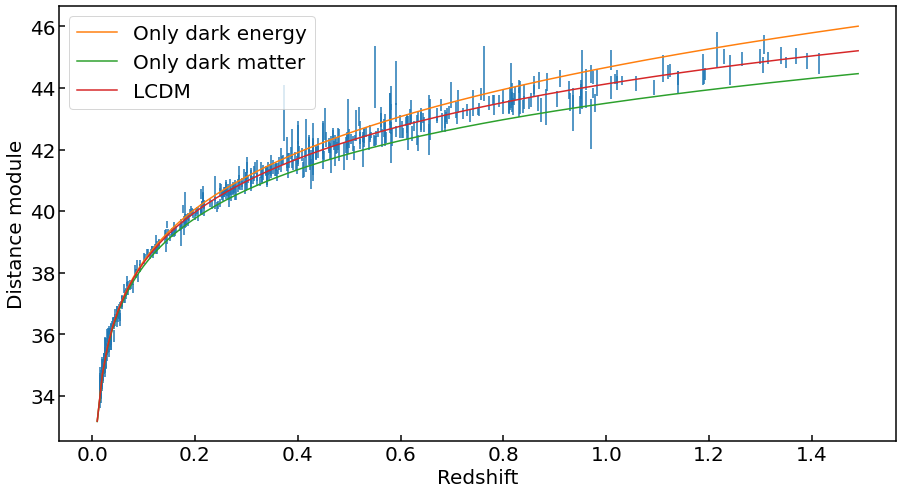

In [110]:
plt.figure(figsize=(15,8))

plt.errorbar(z,dm,dmerr,ls='')
z_list = np.arange(0,1.5,0.01)
plt.plot(z_list,getdmmod([0,1],z_list),label='Only dark energy')
plt.plot(z_list,getdmmod([1,0],z_list),label='Only dark matter')
plt.plot(z_list,getdmmod(fitobj.params,z_list),label='LCDM')
plt.xlabel('Redshift')
plt.ylabel('Distance module')
plt.legend()

# Be careful about cosmological measurements. As you already learn, cosmological measurements are all about uncertainty! More careful analysis is needed if you really want to do the measurements right.  Above is only for data analysis demonstration. 